In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
import warnings 
warnings.simplefilter(action = "ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/Dr. Saleem Akhtar/trafficcongestion/test.csv')
df1.value_counts()

RowId    IntersectionId  Latitude   Longitude   EntryStreetName             ExitStreetName              EntryHeading  ExitHeading  Hour  Weekend  Month  Path                                                         City        
0        1               33.750940  -84.393032  Peachtree Street Southwest  Peachtree Street Southwest  NE            NE           0     0        6      Peachtree Street Southwest_NE_Peachtree Street Southwest_NE  Atlanta         1
1287974  517             39.947555  -75.159221  South 11th Street           South 11th Street           N             N            22    1        9      South 11th Street_N_South 11th Street_N                      Philadelphia    1
1287972  517             39.947555  -75.159221  Locust Street               Locust Street               E             E            22    1        9      Locust Street_E_Locust Street_E                              Philadelphia    1
1287971  517             39.947555  -75.159221  South 11th Street           S

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921357 entries, 0 to 1921356
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   RowId            int64  
 1   IntersectionId   int64  
 2   Latitude         float64
 3   Longitude        float64
 4   EntryStreetName  object 
 5   ExitStreetName   object 
 6   EntryHeading     object 
 7   ExitHeading      object 
 8   Hour             int64  
 9   Weekend          int64  
 10  Month            int64  
 11  Path             object 
 12  City             object 
dtypes: float64(2), int64(5), object(6)
memory usage: 190.6+ MB


In [ ]:
df1=df1.drop(['Latitude','Longitude','Path','Hour','Weekend','Month','Path'], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921357 entries, 0 to 1921356
Data columns (total 7 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   RowId            int64 
 1   IntersectionId   int64 
 2   EntryStreetName  object
 3   ExitStreetName   object
 4   EntryHeading     object
 5   ExitHeading      object
 6   City             object
dtypes: int64(2), object(5)
memory usage: 102.6+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
#time
df=pd.DataFrame()
label=LabelEncoder()
for c in  df1.columns:
    if(df1[c].dtype=='object'):
        df[c]=label.fit_transform(df1[c])
    else:
        df[c]=df1[c]
        
df.head(3)

,RowId,IntersectionId,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,City
0,0,1,1266,1268,2,2,0
1,1,1,1266,951,6,5,0
2,2,1,1266,1268,6,6,0


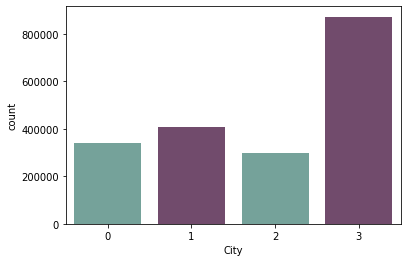

In [ ]:
import seaborn as sns
cols= ["#6daa9f","#774571"]
sns.countplot(x= df["City"], palette= cols)

In [ ]:
#Evauating age distrivution 
#plt.figure(figsize=(20,12))
#colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
#Days_of_week=sns.countplot(x=df['total_link_length_miles'],data=df, hue ="all_motor_vehicles",palette = cols)
#Days_of_week.set_title("total_link_length_miles", color="#774571")

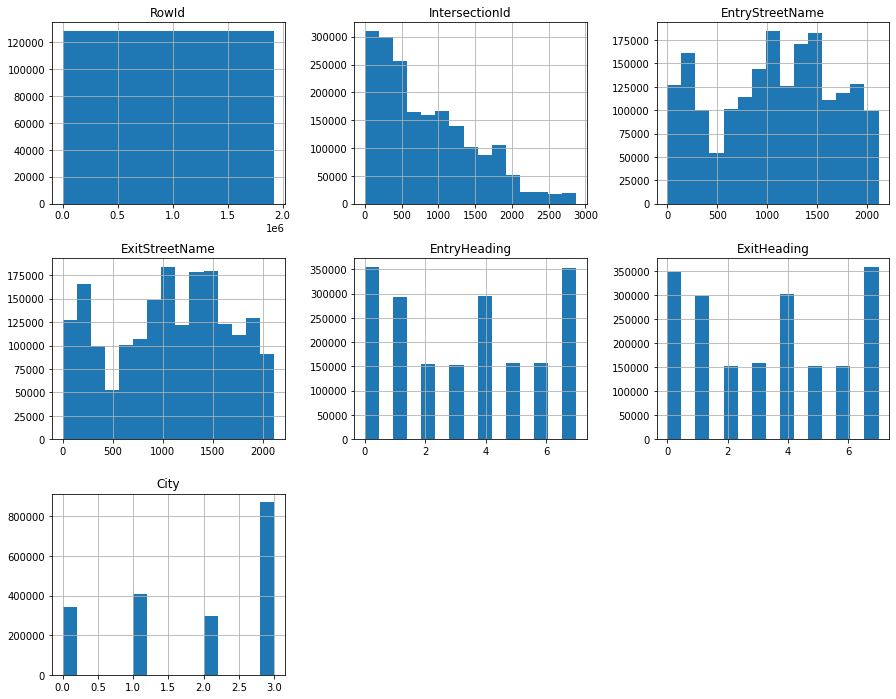

In [ ]:
# Boxen and swarm plot of some non binary features.
#feature = ["Machine","SizeOfOptionalHeader","Characteristics","MajorLinkerVersion","MinorLinkerVersion","SizeOfCode", "SizeOfInitializedData"]
#for i in feature:
#    plt.figure(figsize=(8,8))
#    sns.swarmplot(x=df["legitimate"], y=df[i], color="black", alpha=0.5)
#    sns.boxenplot(x=df["legitimate"], y=df[i], palette=cols)
#    plt.show()
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [ ]:
X = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344949 entries, 265160 to 121958
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype
---  ------           --------------    -----
 0   RowId            1344949 non-null  int64
 1   IntersectionId   1344949 non-null  int64
 2   EntryStreetName  1344949 non-null  int64
 3   ExitStreetName   1344949 non-null  int64
 4   EntryHeading     1344949 non-null  int64
 5   ExitHeading      1344949 non-null  int64
dtypes: int64(6)
memory usage: 71.8 MB


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.pipeline import Pipeline
# Logistic Regression
lr_model = Pipeline([("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42))])

svm_model = Pipeline([("model", SVC(kernel="linear", probability=True ))])

# Decision Tree
dt_model = Pipeline([("model", DecisionTreeClassifier(class_weight="balanced"))])

# Random Forest
rf_model = Pipeline([("model", RandomForestClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1))])

# XGBoost
xgb_model = Pipeline([("model", XGBClassifier())])

In [ ]:
gs = GridSearchCV(lr_model, {"model__C": [1, 1.3, 1.5]}, n_jobs=-1, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1, param_grid={'model__C': [1, 1.3, 1.5]},
             scoring='accuracy')

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1}
0.7161632147900443


In [ ]:
lr_model.set_params(**gs.best_params_)

Pipeline(steps=[('model',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [ ]:
lr_model.get_params("model")

{'memory': None,
 'steps': [('model',
   LogisticRegression(C=1, class_weight='balanced', random_state=42,
                      solver='liblinear'))],
 'verbose': False,
 'model': LogisticRegression(C=1, class_weight='balanced', random_state=42,
                    solver='liblinear'),
 'model__C': 1,
 'model__class_weight': 'balanced',
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': 42,
 'model__solver': 'liblinear',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [ ]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('model',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7163120567375887

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81    102539
           1       0.98      0.00      0.01    122987
           2       0.44      0.84      0.58     89222
           3       0.81      1.00      0.90    261660

    accuracy                           0.72    576408
   macro avg       0.78      0.65      0.57    576408
weighted avg       0.81      0.72      0.64    576408



In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 9.4 MB/s 
     |████████████████████████████████| 133 kB 53.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=9b13f980052c1792e704b077c6762b8586a1b7154d118a5237f55d8a56348a93
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
import eli5
eli5.show_weights(lr_model.named_steps["model"])

In [ ]:
for i in range(1,10):
  print (X_test.iloc[[i]])
  print(y_test.iloc[i])

           RowId  IntersectionId  EntryStreetName  ExitStreetName  \
1580175  1580175            1163              462             464   

         EntryHeading  ExitHeading  
1580175             0            0  
City    3
Name: 1580175, dtype: int64
           RowId  IntersectionId  EntryStreetName  ExitStreetName  \
1548827  1548827            1091              870            1360   

         EntryHeading  ExitHeading  
1548827             5            0  
City    3
Name: 1548827, dtype: int64
           RowId  IntersectionId  EntryStreetName  ExitStreetName  \
1030693  1030693            2686             1843            1837   

         EntryHeading  ExitHeading  
1030693             0            0  
City    2
Name: 1030693, dtype: int64
           RowId  IntersectionId  EntryStreetName  ExitStreetName  \
1195758  1195758             313             1230            1233   

         EntryHeading  ExitHeading  
1195758             1            1  
City    3
Name: 1195758, dtype: in

In [ ]:
y_test.iloc[i]

City    1
Name: 352993, dtype: int64

In [ ]:
gs = GridSearchCV(dt_model, {"model__max_depth": [3, 5, 7], 
                             "model__min_samples_split": [2, 5]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5, 7],
                         'model__min_samples_split': [2, 5]},
             scoring='accuracy')

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 3, 'model__min_samples_split': 2}
0.999997769433808


In [ ]:
dt_model.set_params(**gs.best_params_)

Pipeline(steps=[('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=3))])

In [ ]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9999965302355276

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102539
           1       1.00      1.00      1.00    122987
           2       1.00      1.00      1.00     89222
           3       1.00      1.00      1.00    261660

    accuracy                           1.00    576408
   macro avg       1.00      1.00      1.00    576408
weighted avg       1.00      1.00      1.00    576408



In [ ]:
eli5.show_weights(dt_model.named_steps["model"])

Weight,Feature
1.0000,x0
0,x5
0,x4
0,x3
0,x2
0,x1


In [ ]:
gs = GridSearchCV(rf_model, {"model__max_depth": [10, 15], 
                             "model__min_samples_split": [5, 10]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 15],
                         'model__min_samples_split': [5, 10]},
             scoring='accuracy')

In [ ]:
print(gs.best_params_)
print(gs.best_score_)

{'model__max_depth': 10, 'model__min_samples_split': 5}
1.0


In [ ]:
rf_model.set_params(**gs.best_params_)

Pipeline(steps=[('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=5, n_jobs=-1))])

In [ ]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102539
           1       1.00      1.00      1.00    122987
           2       1.00      1.00      1.00     89222
           3       1.00      1.00      1.00    261660

    accuracy                           1.00    576408
   macro avg       1.00      1.00      1.00    576408
weighted avg       1.00      1.00      1.00    576408



In [ ]:
eli5.show_weights(rf_model.named_steps["model"])

Weight,Feature
0.6888 ± 0.2395,x0
0.1296 ± 0.1310,x1
0.0959 ± 0.1375,x3
0.0748 ± 0.1068,x2
0.0057 ± 0.0115,x5
0.0051 ± 0.0108,x4


In [ ]:
gs = GridSearchCV(xgb_model, {"model__max_depth": [5, 10],
                              "model__min_child_weight": [5, 10],
                              "model__n_estimators": [25]},
                  n_jobs=-1, cv=5, scoring="accuracy")

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', XGBClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 10],
                         'model__min_child_weight': [5, 10],
                         'model__n_estimators': [25]},
             scoring='accuracy')

In [ ]:
print(gs.best_params_)
print(gs.best_score_)
xgb_model.set_params(**gs.best_params_)
xgb_model.fit(X_train, y_train)

{'model__max_depth': 5, 'model__min_child_weight': 5, 'model__n_estimators': 25}
0.999997769433808


Pipeline(steps=[('model',
                 XGBClassifier(max_depth=5, min_child_weight=5, n_estimators=25,
                               objective='multi:softprob'))])

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

1.0

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102539
           1       1.00      1.00      1.00    122987
           2       1.00      1.00      1.00     89222
           3       1.00      1.00      1.00    261660

    accuracy                           1.00    576408
   macro avg       1.00      1.00      1.00    576408
weighted avg       1.00      1.00      1.00    576408



In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 8.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=d923a885d39c4185ee70fbcf5ce74b950490b2b50b10e3d946a4670687e10059
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
svm = GridSearchCV(svm_model, {"model__C": [1, 1.3, 1.5]}, n_jobs=-1, cv=5, scoring="accuracy")
svm.fit(X_train, y_train)

In [ ]:
print(svm.best_params_)
print(svm.best_score_)

In [ ]:
svm_model.set_params(**svm.best_params_)

In [ ]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
eli5.show_weights(svm_model.named_steps["model"])

In [ ]:
print(f"""\
* True label: {y_test.iloc[i]}
* LR: {lr_model.predict_proba(X_observation)[0]}
* SVM: {svm_model.predict_proba(X_observation)[0]}
* DT: {dt_model.predict_proba(X_observation)[0]}
* RF: {rf_model.predict_proba(X_observation)[0]}
* XGB: {xgb_model.predict_proba(X_observation)[0]}""")

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Logistic regression
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)
y_pred_prob_lr = modelLR.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(y_test, y_pred_prob_lr)

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_SVMrbf, tpr_SVMrbf, label='SVM rbf (area = %0.3f)' % roc_auc_SVMrbf)
plt.plot(fpr_SVMlinear, tpr_SVMlinear, label='SVM linear (area = %0.3f)' % roc_auc_SVMlinear)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_rf, tpr_rf, label='RF (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.plot(fpr_en, tpr_en, label='Ensamble (area = %0.3f)' % roc_auc_en)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

In [ ]:
#define metrics
y_pred_proba = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
rf_model.fit(X_train, y_train)

print("Test R^2 Score  : ", rf_model.score(X_test, y_test))
print("Train R^2 Score : ", rf_model.score(X_train, y_train))

In [ ]:
svr_model.fit(X_train, y_train)

print("Test R^2 Score  : ", svr_model.score(X_test, y_test))
print("Train R^2 Score : ", svr_model.score(X_train, y_train))

In [ ]:

eli5.show_prediction(dt_model.named_steps["model"], 
                     dt_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)